In [15]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt

In [30]:
ds = xr.open_zarr("/tmp/zasdjsadelhi/cpcb_camx_ds.zarr.zip")
ds

<xarray.Dataset> Size: 111MB
Dimensions:      (Timestamp: 8760, station: 63)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 70kB 2023-01-01T00:30:00 ... 2023...
    address      (station) <U187 47kB dask.array<chunksize=(63,), meta=np.ndarray>
    city         (station) <U18 5kB dask.array<chunksize=(63,), meta=np.ndarray>
    latitude     (station) float64 504B dask.array<chunksize=(63,), meta=np.ndarray>
    longitude    (station) float64 504B dask.array<chunksize=(63,), meta=np.ndarray>
    state        (station) <U17 4kB dask.array<chunksize=(63,), meta=np.ndarray>
  * station      (station) <U64 16kB 'Alipur, Delhi - DPCC' ... 'Wazirpur, De...
Data variables: (12/26)
    AT           (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    BP           (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    Benzene      (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    CO           (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    Eth-Benzene  (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    MP-Xylene    (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    ...           ...
    TOT-RF       (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    Toluene      (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    VWS          (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    WD           (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    WS           (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>
    Xylene       (Timestamp, station) float64 4MB dask.array<chunksize=(2190, 32), meta=np.ndarray>

In [31]:
ds.station.values

array(['Alipur, Delhi - DPCC', 'Anand Vihar, Delhi - DPCC',
       'Arya Nagar, Bahadurgarh - HSPCB', 'Ashok Vihar, Delhi - DPCC',
       'Aya Nagar, Delhi - IMD', 'Bawana, Delhi - DPCC',
       'Burari Crossing, Delhi - IMD', 'CRRI Mathura Road, Delhi - IMD',
       'Chandni Chowk, Delhi - IITM', 'DTU, Delhi - CPCB',
       'Dr. Karni Singh Shooting Range, Delhi - DPCC',
       'Dwarka-Sector 8, Delhi - DPCC', 'IGI Airport (T3), Delhi - IMD',
       'IHBAS, Dilshad Garden, Delhi - CPCB', 'ITO, Delhi - CPCB',
       'Indirapuram, Ghaziabad - UPPCB', 'Jahangirpuri, Delhi - DPCC',
       'Jawaharlal Nehru Stadium, Delhi - DPCC',
       'Knowledge Park - III, Greater Noida - UPPCB',
       'Knowledge Park - V, Greater Noida - UPPCB',
       'Lodhi Road, Delhi - IITM', 'Lodhi Road, Delhi - IMD',
       'Loni, Ghaziabad - UPPCB',
       'Major Dhyan Chand National Stadium, Delhi - DPCC',
       'Mandir Marg, Delhi - DPCC', 'Mundka, Delhi - DPCC',
       'NISE Gwal Pahari, Gurugram - IMD', '

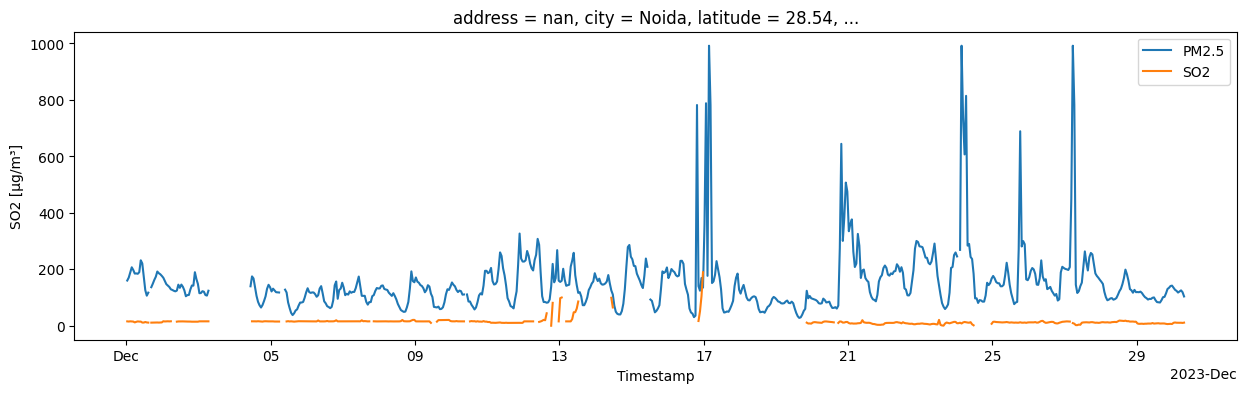

In [62]:
fig, ax = plt.subplots(figsize=(15, 4))
station = "Sector - 125, Noida - UPPCB"
time = "2023-12"
ds.sel(station=station, Timestamp=time)["PM2.5"].plot(ax=ax, label="PM2.5")
(ds.sel(station=station, Timestamp=time)["SO2"]).plot(ax=ax, label="SO2")
# (ds.sel(station=station, Timestamp=time)["NO2"]*3).plot(ax=ax, label="NO2")
# (ds.sel(station=station, Timestamp=time)["CO"]*30).plot(ax=ax, label="CO")
# ds.isel(station=s_id)["Ozone"].plot(ax=ax, label="Ozone")
plt.legend();

In [5]:
import simplekml

In [6]:
ds["station"].to_dataframe()

,address,city,latitude,longitude,state,station
station,,,,,,
"Alipur, Delhi - DPCC",Mahatma Gandhi Insititute for Combating Climat...,Delhi,28.815329,77.153010,Delhi,"Alipur, Delhi - DPCC"
"Anand Vihar, Delhi - DPCC",nan,Delhi,28.647622,77.315809,Delhi,"Anand Vihar, Delhi - DPCC"
"Arya Nagar, Bahadurgarh - HSPCB","Mini secretariat 301/13, Balaur Rd Kashmiri Co...",Bahadurgarh,28.670100,76.925400,Haryana,"Arya Nagar, Bahadurgarh - HSPCB"
"Ashok Vihar, Delhi - DPCC",nan,Delhi,28.695381,77.181665,Delhi,"Ashok Vihar, Delhi - DPCC"
"Aya Nagar, Delhi - IMD",nan,Delhi,28.470691,77.109936,Delhi,"Aya Nagar, Delhi - IMD"
...,...,...,...,...,...,...
"Teri Gram, Gurugram - HSPCB",Haryana State Pollution Control Board Faridaba...,Gurugram,28.427500,77.146500,Haryana,"Teri Gram, Gurugram - HSPCB"
"Vasundhara, Ghaziabad - UPPCB",nan,Ghaziabad,28.660335,77.357256,Uttar Pradesh,"Vasundhara, Ghaziabad - UPPCB"
"Vikas Sadan, Gurugram - HSPCB",nan,Gurugram,28.450124,77.026305,Haryana,"Vikas Sadan, Gurugram - HSPCB"


In [7]:
# convert to kml
kml = simplekml.Kml()
for i in range(ds["station"].size):
    pnt = kml.newpoint()
    pnt.name = ds["station"].values[i]
    pnt.coords = [(ds["longitude"].values[i], ds["latitude"].values[i])]

kml.save("cpcb_camx_ds.kml")